# Assignment 3

## Text Classification Using Scikit-Learn

### Introduction to Machine Learning 

## FA15-BCS
## Omer Javed
## Section A

# Phase 1 & 2

## step 1 : Import Libraries

In [675]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from astropy.table import Table,Column
import seaborn as sns

## Step 2: Read, Understand and Pre-process Train/Test Data

Read, Understand and Pre-process Train/Test Data

### Step 2.1: Read Data

In [676]:
train_data = pd.read_csv('train.csv')
train_data

,comment_text,gender
0,r u cmng or u not cmng,male
1,r you cmng,female
2,"I am fine, r u fine",male
3,m fn and you,female
4,"my frnd is gr8, wll dn.",male
5,my best friend is great,female


In [677]:
test_data = pd.read_csv('test.csv')
test_data

,comment_text,gender
0,"plz go out, plz out with with frnd",male
1,"r u going to walk, r u?",female
2,r you find,male
3,are you find,female


### Step 2.2: Understand Data

In [678]:
print('Train Dataset Columns: ')
train_data.columns

Train Dataset Columns: 


Index(['comment_text', 'gender'], dtype='object')

In [679]:
print('Number of instaces in Train Dataset:')
print("Train Instances: ",len(train_data))

Number of instaces in Train Dataset:
Train Instances:  6


In [680]:
train_data.columns

Index(['comment_text', 'gender'], dtype='object')

In [681]:
print('Number of instaces in Test Dataset:')
print("Test Instances: ",len(test_data))

Number of instaces in Test Dataset:
Test Instances:  4


In [682]:
print('Number of instance of Male / Female in Train data:')
train_data.gender.value_counts()

Number of instance of Male / Female in Train data:


female    3
male      3
Name: gender, dtype: int64

In [683]:
print('Number of instance of Male / Female in Test data:')
test_data.gender.value_counts()

Number of instance of Male / Female in Test data:


female    2
male      2
Name: gender, dtype: int64

In [684]:
print('Comments by \'Male\' in Train Dataset:')
train_data[train_data.gender == 'male']

Comments by 'Male' in Train Dataset:


,comment_text,gender
0,r u cmng or u not cmng,male
2,"I am fine, r u fine",male
4,"my frnd is gr8, wll dn.",male


In [685]:
print('Comments by \'Female\' in Train Dataset:')
train_data[train_data.gender == 'female']

Comments by 'Female' in Train Dataset:


,comment_text,gender
1,r you cmng,female
3,m fn and you,female
5,my best friend is great,female


In [686]:
print('Comments by \'Male\' in Test Dataset:')
test_data[test_data.gender == 'male']

Comments by 'Male' in Test Dataset:


,comment_text,gender
0,"plz go out, plz out with with frnd",male
2,r you find,male


In [687]:
print('Comments by \'Female\' in Train Dataset:')
test_data[test_data.gender == 'female']

Comments by 'Female' in Train Dataset:


,comment_text,gender
1,"r u going to walk, r u?",female
3,are you find,female


#### Frequency Counter of Words in Male train data 

In [688]:
print('Comments Frequency of males in Train data:')

words_count_male_train_data = train_data[
    train_data.gender=='male'].comment_text.str.split(
    expand=True).stack().value_counts()
words_count_male_train_data

Comments Frequency of males in Train data:


u        3
r        2
cmng     2
frnd     1
is       1
am       1
wll      1
dn.      1
fine,    1
gr8,     1
fine     1
or       1
I        1
my       1
not      1
dtype: int64

##### Understanding data via graphs

Bar graph of Words used by a male in Train Data


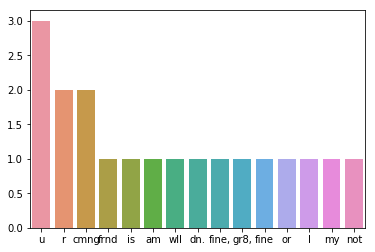

In [689]:
print('Bar graph of Words used by a male in Train Data')
sns.barplot(x = words_count_male_train_data.keys(),
            y =words_count_male_train_data.values)


#### Frequency Counter of Words in Female train data 

In [690]:
print('Comments Frequency of Females in Train data:')

words_count_female_train_data = train_data[
    train_data.gender=='female'].comment_text.str.split(
    expand=True).stack().value_counts()
words_count_female_train_data

Comments Frequency of Females in Train data:


you       2
is        1
and       1
m         1
fn        1
best      1
my        1
great     1
cmng      1
friend    1
r         1
dtype: int64

##### Understanding data via graphs

Bar graph of Words used by a female in Train Data


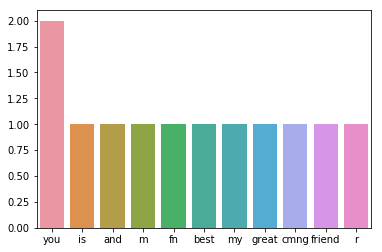

In [691]:
print('Bar graph of Words used by a female in Train Data')
sns.barplot(x = words_count_female_train_data.keys(),
            y =words_count_female_train_data.values)


#### Frequency Counter of Words in Male test data 

In [692]:
print('Comments Frequency of males in Test data:')

words_count_male_test_data = test_data[
    test_data.gender=='male'].comment_text.str.split(
    expand=True).stack().value_counts()
words_count_male_test_data

Comments Frequency of males in Test data:


with    2
plz     2
go      1
you     1
frnd    1
find    1
out     1
out,    1
r       1
dtype: int64

##### Understanding data via graphs

Bar graph of Words used by a male in Test Data


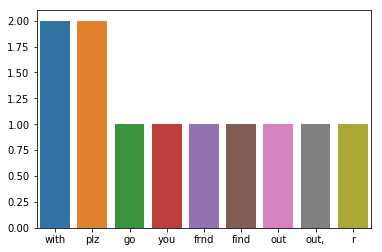

In [693]:
print('Bar graph of Words used by a male in Test Data')
sns.barplot(x = words_count_male_test_data.keys(),
            y =words_count_male_test_data.values)


#### Frequency Counter of Words in Female test data 

In [694]:

print('Comments Frequency of Females in Test data:')

words_count_female_test_data = test_data[
    test_data.gender=='female'].comment_text.str.split(
    expand=True).stack().value_counts()
words_count_female_test_data

Comments Frequency of Females in Test data:


r        2
going    1
you      1
find     1
are      1
u?       1
walk,    1
to       1
u        1
dtype: int64

##### Understanding data via graphs

Bar graph of Words used by a female in Test Data


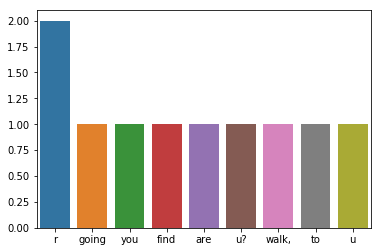

In [695]:
print('Bar graph of Words used by a female in Test Data')
sns.barplot(x = words_count_female_test_data.keys(),
            y =words_count_female_test_data.values)


### Step 2.3: Pre-process Data

In [696]:
print('Train dataset before pre-processing:')
train_data_unprocessed = train_data.copy(deep = True)
train_data

Train dataset before pre-processing:


,comment_text,gender
0,r u cmng or u not cmng,male
1,r you cmng,female
2,"I am fine, r u fine",male
3,m fn and you,female
4,"my frnd is gr8, wll dn.",male
5,my best friend is great,female


In [697]:
print('Test dataset before pre-processing:')
test_data_unprocessed = test_data.copy(deep = True)
test_data

Test dataset before pre-processing:


,comment_text,gender
0,"plz go out, plz out with with frnd",male
1,"r u going to walk, r u?",female
2,r you find,male
3,are you find,female


##### Convert text to lowercase


In [698]:
print('train data:\n' ,train_data)
print('\n\ntest data:\n' ,test_data)


train data:
               comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2      I am fine, r u fine    male
3             m fn and you  female
4  my frnd is gr8, wll dn.    male
5  my best friend is great  female


test data:
                          comment_text  gender
0  plz go out, plz out with with frnd    male
1             r u going to walk, r u?  female
2                          r you find    male
3                        are you find  female


In [699]:
train_data.comment_text = train_data.comment_text.str.lower()
test_data.comment_text = test_data.comment_text.str.lower()


In [700]:
print('Converted to lower case if any :\n\n')
print('train data:\n' ,train_data)
print('\n\ntest data:\n' ,test_data)


Converted to lower case if any :


train data:
               comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2      i am fine, r u fine    male
3             m fn and you  female
4  my frnd is gr8, wll dn.    male
5  my best friend is great  female


test data:
                          comment_text  gender
0  plz go out, plz out with with frnd    male
1             r u going to walk, r u?  female
2                          r you find    male
3                        are you find  female


##### Remove numbers

In [701]:
train_data.comment_text = train_data.comment_text.str.replace(r'\d+','')
test_data.comment_text = test_data.comment_text.str.replace(r'\d+','')

In [702]:
print('Converted to lower case if any :\n\n')
print('train data:\n' ,train_data)
print('\n\ntest data:\n' ,test_data)


Converted to lower case if any :


train data:
               comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2      i am fine, r u fine    male
3             m fn and you  female
4   my frnd is gr, wll dn.    male
5  my best friend is great  female


test data:
                          comment_text  gender
0  plz go out, plz out with with frnd    male
1             r u going to walk, r u?  female
2                          r you find    male
3                        are you find  female


##### Remove punctuation

The following code removes this set of symbols [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:

In [703]:
train_data.comment_text = train_data.comment_text.str.replace(r'[!|”|#|$|%|&|\'||(|)|*|+|,|-|.|/|:|;|<|=|>|?|@|[|]|^|_|`|{|||}|~|]','')
test_data.comment_text = test_data.comment_text.str.replace(r'[!|”|#|$|%|&|\'||(|)|*|+|,|-|.|/|:|;|<|=|>|?|@|[|]|^|_|`|{|||}|~|]','')


In [704]:
print('Removed punctuation if any :\n\n')
print('train data:\n' ,train_data)
print('\n\ntest data:\n' ,test_data)


Removed punctuation if any :


train data:
               comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2       i am fine r u fine    male
3             m fn and you  female
4     my frnd is gr wll dn    male
5  my best friend is great  female


test data:
                         comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you find    male
3                       are you find  female


##### Remove whitespaces

In [705]:
train_data.comment_text  = train_data.comment_text.str.strip()
test_data.comment_text  = test_data.comment_text.str.strip()

In [706]:
print('Removed white spaces if any :\n\n')
print('train data:\n' ,train_data)
print('\n\ntest data:\n' ,test_data)


Removed white spaces if any :


train data:
               comment_text  gender
0   r u cmng or u not cmng    male
1               r you cmng  female
2       i am fine r u fine    male
3             m fn and you  female
4     my frnd is gr wll dn    male
5  my best friend is great  female


test data:
                         comment_text  gender
0  plz go out plz out with with frnd    male
1              r u going to walk r u  female
2                         r you find    male
3                       are you find  female


In [707]:
from IPython.display import display_html 

df1_styler = train_data_unprocessed.style.set_table_attributes("style='display:inline'").set_caption('Train dataset before pre-processing:')
df2_styler = train_data.style.set_table_attributes("style='display:inline'").set_caption('Train dataset after pre-processing:')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,comment_text,gender
0,r u cmng or u not cmng,male
1,r you cmng,female
2,"I am fine, r u fine",male
3,m fn and you,female
4,"my frnd is gr8, wll dn.",male
5,my best friend is great,female
,comment_text,gender
0,r u cmng or u not cmng,male
1,r you cmng,female
2,i am fine r u fine,male


In [708]:
df1_styler = test_data_unprocessed.style.set_table_attributes("style='display:inline'").set_caption('Test dataset before pre-processing:')
df2_styler = test_data.style.set_table_attributes("style='display:inline'").set_caption('Test dataset after pre-processing:')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,comment_text,gender
0,"plz go out, plz out with with frnd",male
1,"r u going to walk, r u?",female
2,r you find,male
3,are you find,female
,comment_text,gender
0,plz go out plz out with with frnd,male
1,r u going to walk r u,female
2,r you find,male
3,are you find,female


## Step 3: Label Encoding for Train/Test Data

In [709]:
def encodegender(data):
    return data.gender.map({'female':0,'male':1}).astype(int)

In [710]:
def decodegender(data):
    return data.map({0:'female',1:'male'})

In [712]:
df = train_data.copy(deep=False)
df['encoded_gender'] = encodegender(train_data)
print('Train Dataset Labels Encoding:')
df

Train Dataset Labels Encoding:


,comment_text,gender,encoded_gender
0,r u cmng or u not cmng,male,1
1,r you cmng,female,0
2,i am fine r u fine,male,1
3,m fn and you,female,0
4,my frnd is gr wll dn,male,1
5,my best friend is great,female,0


In [713]:
df = test_data.copy(deep=False)
df['encoded_gender'] = encodegender(test_data)
print('Test Dataset Labels Encoding:')
df

Test Dataset Labels Encoding:


,comment_text,gender,encoded_gender
0,plz go out plz out with with frnd,male,1
1,r u going to walk r u,female,0
2,r you find,male,1
3,are you find,female,0


In [714]:
train_data.gender = encodegender(train_data)

In [715]:
print('Label Encoded Train data:')
train_data

Label Encoded Train data:


,comment_text,gender
0,r u cmng or u not cmng,1
1,r you cmng,0
2,i am fine r u fine,1
3,m fn and you,0
4,my frnd is gr wll dn,1
5,my best friend is great,0


In [716]:
test_data.gender = encodegender(test_data)
print('Label Encoded Test data:')
test_data

Label Encoded Test data:


,comment_text,gender
0,plz go out plz out with with frnd,1
1,r u going to walk r u,0
2,r you find,1
3,are you find,0


## Step 4: Feature Extraction – Changing Representation of Data “from String to Vector”

 **vect = CountVectorizer(
strip_accents='unicode',
analyzer='word',
token_pattern=r'\w{1,}',
stop_words='english',
ngram_range=(1, 1),
max_features=10)**

**print("Parameters of TfidfVectorizer and its values:\n\n")**

**print(vect)**

In [717]:
vect = CountVectorizer( strip_accents='unicode',
                       analyzer='word',
                       token_pattern=r'\w{1,}',
                       stop_words='english',
                       ngram_range=(1, 1), max_features=10) 
print("Parameters of TfidfVectorizer and its values:\n\n")
print(vect)

Parameters of TfidfVectorizer and its values:


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)


In [718]:
X = vect.fit_transform(train_data.comment_text)

In [719]:
vect.get_feature_names()
train_vect = pd.DataFrame(X.toarray(),columns = vect.get_feature_names())
print('Train Features Before Assigning a \'gender\' Column:')
train_vect

Train Features Before Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,2,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,2,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0
5,1,0,0,0,0,1,0,0,0,0


In [720]:
y = vect.transform(test_data.comment_text)

In [721]:
test_vect = pd.DataFrame(y.toarray(),columns = vect.get_feature_names())
print('Test Features Before Assigning a \'gender\' Column:')

test_vect

Test Features Before Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,2,2
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0


In [722]:
print('Check shape of the Features:')
print("Train Features Shape " ,train_vect.shape)
print("Test  Features Shape ",test_vect.shape)

Check shape of the Features:
Train Features Shape  (6, 10)
Test  Features Shape  (4, 10)


In [723]:
print('Train Features after Assigning a \'gender\' Column:')
train_vect['gender'] = train_data.gender
train_vect

Train Features after Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0


In [724]:
print('Test Features after Assigning a \'gender\' Column:')
test_vect['gender'] = test_data.gender
test_vect

Test Features after Assigning a 'gender' Column:


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0


In [725]:
print('Check shape of the Features After adding gender column:')
print("Train Features Shape " ,train_vect.shape)
print("Test  Features Shape ",test_vect.shape)

Check shape of the Features After adding gender column:
Train Features Shape  (6, 11)
Test  Features Shape  (4, 11)


## Step 5: Train Machine Learning Algorithms using Training Data

In [726]:
train_X = train_vect.drop('gender',axis=1)
train_y = train_vect['gender']


In [727]:
print('Training Data:\n')
df1_styler = train_X.style.set_table_attributes("style='display:inline'").set_caption('Train Examples Input:')
df2_styler = pd.DataFrame(train_y).style.set_table_attributes("style='display:inline'").set_caption('Train Examples Output:')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Training Data:



Train Examples Input: 
 
 
 best 
 cmng 
 dn 
 fine 
 fn 
 friend 
 frnd 
 gr 
 r 
 u 
 
 
 0 
 0 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 2 
 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 2 
 0 
 0 
 0 
 2 
 0 
 0 
 0 
 0 
 1 
 1 
 
 3 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 
 5 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 Train Examples Output: 
 
 
 gender 
 
 
 0 
 1 
 
 1 
 0 
 
 2 
 1 
 
 3 
 0 
 
 4 
 1 
 
 5 
 0

In [728]:
test_X = test_vect.drop('gender',axis=1)
test_y = test_vect['gender']


In [729]:
print('Training Data:\n')
df1_styler = test_X.style.set_table_attributes("style='display:inline'").set_caption('Test Examples Input:')
df2_styler = pd.DataFrame(test_y).style.set_table_attributes("style='display:inline'").set_caption('Test Examples Output:')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Training Data:



Test Examples Input: 
 
 
 best 
 cmng 
 dn 
 fine 
 fn 
 friend 
 frnd 
 gr 
 r 
 u 
 
 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 2 
 2 
 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 Test Examples Output: 
 
 
 gender 
 
 
 0 
 1 
 
 1 
 0 
 
 2 
 1 
 
 3 
 0

##### Models of Machine Learning

##### Logistic Regression Parameters

Parameters and their values:

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [730]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(train_X,train_y)
LogisticRegression_prediction = LogisticRegression.predict(test_X)
accuracy_LogisticRegression = accuracy_score(test_y,LogisticRegression_prediction)


##### Random forest  Parameters

Parameters and their values:

RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

In [731]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(train_X,train_y)
RandomForestClassifier_prediction = RandomForestClassifier.predict(test_X)
accuracy_RandomForestClassifier = accuracy_score(test_y,RandomForestClassifier_prediction)


##### Linear SVC Parameters
Parameters and their values:

LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

In [732]:
from sklearn.svm import LinearSVC
LinearSVC = LinearSVC()
LinearSVC.fit(train_X,train_y)
LinearSVC_prediction = LinearSVC.predict(test_X)
accuracy_LinearSVC = accuracy_score(test_y,prediction)


##### BernoulliNB
Parameters and their values:

BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [733]:
from sklearn.naive_bayes import BernoulliNB
BernoulliNB = BernoulliNB()
BernoulliNB.fit(train_X,train_y)
BernoulliNB_prediction = BernoulliNB.predict(test_X)
accuracy_BernoulliNB = accuracy_score(test_y,prediction)


## Step 6: Evaluate Machine Learning Algorithms using Test Data

#### Logistic Regression Classifier

In [737]:
test_vect

,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0


In [738]:
x=test_data.copy()
x.gender = decodegender(x.gender)
x['predicted_gender']=decodegender(pd.Series(LogisticRegression_prediction))

In [739]:
print('Prediction using Logistic Regression\n')
print(x)
print('\nAccuracy Score = ',accuracy_LogisticRegression)

Prediction using Logistic Regression

                        comment_text  gender predicted_gender
0  plz go out plz out with with frnd    male             male
1              r u going to walk r u  female             male
2                         r you find    male           female
3                       are you find  female           female

Accuracy Score =  0.5


#### Random Forest Classifier

In [740]:
x=test_data.copy()
x.gender = decodegender(x.gender)
x['predicted_gender']=decodegender(pd.Series(RandomForestClassifier_prediction))


In [741]:
print('Prediction using RandomForestClassifier\n')
print(x)
print('\nAccuracy Score = ',accuracy_RandomForestClassifier)

Prediction using RandomForestClassifier

                        comment_text  gender predicted_gender
0  plz go out plz out with with frnd    male           female
1              r u going to walk r u  female           female
2                         r you find    male           female
3                       are you find  female           female

Accuracy Score =  0.5


##### BernoulliNB

In [742]:
x=test_data.copy()
x.gender = decodegender(x.gender)
x['predicted_gender']=decodegender(pd.Series(BernoulliNB_prediction))

In [743]:
print('Prediction using BernoulliNB\n')
print(x)
print('\nAccuracy Score = ',accuracy_BernoulliNB)

Prediction using BernoulliNB

                        comment_text  gender predicted_gender
0  plz go out plz out with with frnd    male           female
1              r u going to walk r u  female             male
2                         r you find    male           female
3                       are you find  female           female

Accuracy Score =  0.25


##### LinearSVC

In [744]:
x=test_data.copy()
x.gender = decodegender(x.gender)
x['predicted_gender']=decodegender(pd.Series(LinearSVC_prediction))

In [745]:
print('Prediction using LinearSVC\n')
print(x)
print('\nAccuracy Score = ',accuracy_LinearSVC)

Prediction using LinearSVC

                        comment_text  gender predicted_gender
0  plz go out plz out with with frnd    male           female
1              r u going to walk r u  female             male
2                         r you find    male           female
3                       are you find  female           female

Accuracy Score =  0.25


## Step 7: Selection of Best Model

In [746]:
models = pd.DataFrame({'Models':
                       ['LogisticRegression',
                        'RandomForestClassifier',
                        'LinearSVC',
                        'BernoulliN'],
                       'Accuracy':[accuracy_LogisticRegression,
                                  accuracy_RandomForestClassifier,
                                  accuracy_LinearSVC,
                                  accuracy_BernoulliNB]
                        })

In [747]:
print('Detail Performance of all the models')
models

Detail Performance of all the models


,Models,Accuracy
0,LogisticRegression,0.50
1,RandomForestClassifier,0.50
2,LinearSVC,0.25
3,BernoulliN,0.25


In [748]:
print("Best Model")
models.max()

Best Model


Models      RandomForestClassifier
Accuracy                       0.5
dtype: object

## Step 8: Application Phase

### Step 8.1: Combine Data (Train + Test )

In [749]:
print('Train Features in form of Datafram:\n')
print(train_vect)

Train Features in form of Datafram:

   best  cmng  dn  fine  fn  friend  frnd  gr  r  u  gender
0     0     2   0     0   0       0     0   0  1  2       1
1     0     1   0     0   0       0     0   0  1  0       0
2     0     0   0     2   0       0     0   0  1  1       1
3     0     0   0     0   1       0     0   0  0  0       0
4     0     0   1     0   0       0     1   1  0  0       1
5     1     0   0     0   0       1     0   0  0  0       0


In [750]:
print('Test Features in form of Datafram:\n')
print(test_vect)

Test Features in form of Datafram:

   best  cmng  dn  fine  fn  friend  frnd  gr  r  u  gender
0     0     0   0     0   0       0     1   0  0  0       1
1     0     0   0     0   0       0     0   0  2  2       0
2     0     0   0     0   0       0     0   0  1  0       1
3     0     0   0     0   0       0     0   0  0  0       0


In [751]:
train_test_data = pd.concat([train_vect,test_vect],axis=0)

In [752]:
print('All Features in form of Dataframe:')
train_test_data

All Features in form of Dataframe:


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0


### Step 8.2: Train Best Model (see Step 7) on all data(Train + Test)

##### Which is Random forest in our case

In [753]:
RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [754]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
X = train_test_data.drop('gender',axis=1)
y = train_test_data['gender']

trainedModel = RandomForestClassifier.fit(scipy.sparse.csr_matrix(X),y)


### Step 8.3: Save the Trained Model as Pickle File

In [762]:
f = open('trainedModelfile','wb')
pickle.dump(trainedModel,f)
f.close()

In [763]:
f = open('vectorCounterfile','wb')
pickle.dump(vect,f)
f.close()

## Step 9: Make prediction on unseen/new data

### Step 9.1: Load the Trained Model (saved in Step 8.3)

In [764]:
print('Method for de-coding predicted value')
def decodegender(data):
    return data.map({0:'female',1:'male'})

Method for de-coding predicted value


Method for preproccessing of User Input

In [765]:
def preprocessdata(data):
    data.comment_text = data.comment_text.str.lower()
    data.comment_text = data.comment_text.str.replace(r'\d+','')
    data.comment_text = data.comment_text.str.replace(r'[!|”|#|$|%|&|\'||(|)|*|+|,|-|.|/|:|;|<|=|>|?|@|[|]|^|_|`|{|||}|~|]','')
    data.comment_text  = data.comment_text.str.strip()


Load Trainned Model and text vectorizor from Memory

In [766]:

f = open('trainedModelfile','rb')

trained_model = pickle.load(f)
f.close()
f = open('vectorCounterfile','rb')
vect = pickle.load(f)
f.close()

### Step 9.2: Take Input from User

In [767]:
text = input('Write your comment here: ')

Write your comment here: Plz go out, plz out with with frnd


### Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)

In [768]:
input_vector = pd.DataFrame({'comment_text':text},index=[0])

In [774]:
print('User input in Actual DataFrame form:')
input_vector

User input in Actual DataFrame form:


,comment_text
0,"Plz go out, plz out with with frnd"


In [775]:
print('Vector features:',vect.get_feature_names())

Vector features: ['best', 'cmng', 'dn', 'fine', 'fn', 'friend', 'frnd', 'gr', 'r', 'u']


In [776]:
print('preprocessed user input')
preprocessdata(input_vector)

preprocessed user input


In [777]:
print("User input after preprocessing:")
input_vector

User input after preprocessing:


,comment_text
0,plz go out plz out with with frnd


In [779]:
input_vector_X = vect.transform(input_vector.comment_text)
vect_user_input = pd.DataFrame(input_vector_X.toarray(),
                               columns=vect.get_feature_names())
print('User input features with weights')
vect_user_input

User input features with weights


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,0,0,0,0,0,1,0,0,0


### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

In [780]:
prediction_of_user_input = trained_model.predict(vect_user_input)
prediction_of_user_input

array([1])

In [781]:
decoded_prediction_of_user_input = decodegender(pd.Series(prediction_of_user_input))[0]


In [782]:
print("Prediction : ",decoded_prediction_of_user_input)

Prediction :  male
